In [37]:
import os,sys
import pandas as pd
import collections
import matplotlib
from collections import defaultdict, Counter

import sourmash
from sourmash.lca import lca_utils

import plotly.graph_objects as go

figs_path = os.path.abspath(os.path.join('../figs'))
if figs_path not in sys.path:
    sys.path.append(figs_path)#+"\\nn_webserver")
print(sys.path)
    
from sourmash_sankey import GenomeSankeyFlow

['/Users/tessa/dib-lab/2021-benchmarking-dev/notebooks', '/Users/tessa/miniconda3/envs/benchsets/lib/python38.zip', '/Users/tessa/miniconda3/envs/benchsets/lib/python3.8', '/Users/tessa/miniconda3/envs/benchsets/lib/python3.8/lib-dynload', '', '/Users/tessa/miniconda3/envs/benchsets/lib/python3.8/site-packages', '/Users/tessa/miniconda3/envs/benchsets/lib/python3.8/site-packages/IPython/extensions', '/Users/tessa/.ipython', '/Users/tessa/dib-lab/2021-benchmarking-dev/figs']


In [38]:
pd.__version__

'1.1.3'

In [39]:
from IPython.display import display, Markdown

In [40]:
pathInfo = pd.read_csv("../gtdb95-evolpaths.csv.gz")
pathInfo

,accession,path,rank,lineage
0,GCA_003661365.1,path1,superkingdom,d__Archaea;p__Thermoproteota;c__Korarchaeia;o_...
1,GCA_003661365.1,path2,superkingdom,d__Archaea;p__Thermoproteota;c__Korarchaeia;o_...
2,GCA_003661365.1,path3,superkingdom,d__Archaea;p__Thermoproteota;c__Korarchaeia;o_...
3,GCA_003661365.1,path4,superkingdom,d__Archaea;p__Thermoproteota;c__Korarchaeia;o_...
4,GCA_003661365.1,path5,superkingdom,d__Archaea;p__Thermoproteota;c__Korarchaeia;o_...
...,...,...,...,...
20694,GCA_002774315.1,path2957,phylum,d__Bacteria;p__WOR-3;c__UBA3073;o__UBA3073;f__...
20695,GCA_003645615.1,path2957,order,d__Bacteria;p__WOR-3;c__WOR-3;o__SM23-42;f__B3...
20696,GCA_001303785.1,path2957,family,d__Bacteria;p__WOR-3;c__WOR-3;o__SM23-42;f__SM...
20697,GCA_001303225.1,path2957,genus,d__Bacteria;p__WOR-3;c__WOR-3;o__SM23-42;f__SM...


In [41]:
genome_info = pathInfo.drop(columns=["path", "rank"])
genome_info.drop_duplicates(inplace=True)
genome_info 

,accession,lineage
0,GCA_003661365.1,d__Archaea;p__Thermoproteota;c__Korarchaeia;o_...
52,GCA_001940645.1,d__Archaea;p__Asgardarchaeota;c__Heimdallarcha...
54,GCA_005191425.1,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...
56,GCA_004524545.1,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...
58,GCA_004375715.1,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...
...,...,...
20694,GCA_002774315.1,d__Bacteria;p__WOR-3;c__UBA3073;o__UBA3073;f__...
20695,GCA_003645615.1,d__Bacteria;p__WOR-3;c__WOR-3;o__SM23-42;f__B3...
20696,GCA_001303785.1,d__Bacteria;p__WOR-3;c__WOR-3;o__SM23-42;f__SM...
20697,GCA_001303225.1,d__Bacteria;p__WOR-3;c__WOR-3;o__SM23-42;f__SM...


In [42]:
bact_lineage = lca_utils.make_lineage("d__Bacteria")
arch_lineage = lca_utils.make_lineage("d__Archaea")
arch_lineage

(LineagePair(rank='superkingdom', name='d__Archaea'),)

In [43]:
def make_lineages(row):
    row["lineage"] = lca_utils.make_lineage(row["lineage"])
    return row

In [44]:
genome_info = genome_info.apply(make_lineages, axis=1)

In [45]:
genome_info

,accession,lineage
0,GCA_003661365.1,"((superkingdom, d__Archaea), (phylum, p__Therm..."
52,GCA_001940645.1,"((superkingdom, d__Archaea), (phylum, p__Asgar..."
54,GCA_005191425.1,"((superkingdom, d__Archaea), (phylum, p__Asgar..."
56,GCA_004524545.1,"((superkingdom, d__Archaea), (phylum, p__Asgar..."
58,GCA_004375715.1,"((superkingdom, d__Archaea), (phylum, p__Asgar..."
...,...,...
20694,GCA_002774315.1,"((superkingdom, d__Bacteria), (phylum, p__WOR-..."
20695,GCA_003645615.1,"((superkingdom, d__Bacteria), (phylum, p__WOR-..."
20696,GCA_001303785.1,"((superkingdom, d__Bacteria), (phylum, p__WOR-..."
20697,GCA_001303225.1,"((superkingdom, d__Bacteria), (phylum, p__WOR-..."


In [46]:
lineageD = pd.Series(genome_info.lineage.values,index=genome_info.accession).to_dict()

In [47]:
lineageD["GCA_003661365.1"]

(LineagePair(rank='superkingdom', name='d__Archaea'),
 LineagePair(rank='phylum', name='p__Thermoproteota'),
 LineagePair(rank='class', name='c__Korarchaeia'),
 LineagePair(rank='order', name='o__Korarchaeales'),
 LineagePair(rank='family', name='f__QMVU01'),
 LineagePair(rank='genus', name='g__QMVU01'),
 LineagePair(rank='species', name='s__QMVU01 sp003661365'))

In [48]:
arch_lineage

(LineagePair(rank='superkingdom', name='d__Archaea'),)

In [49]:
all_lineages = list(lineageD.values())

In [50]:
test_lin = lineageD["GCA_003661365.1"]

lca_utils.is_lineage_match(test_lin, arch_lineage, 'superkingdom')

1

In [51]:
# start with charcoal fig functions
def make_plotly_fig(obj, title):
    "Build a plotly figure/sankey diagram."
    # make the data to go into the sankey figure.
    labels = obj.make_labels()
    src_l, dest_l, cnt_l, color_l, label_l = obj.make_lists()

    # build figure
    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 15,
          thickness = 10,
          line = dict(color = "black", width = 0.5),
          label = labels,
          color = "darkgrey"
        ),
        link = dict(
          source = src_l,
          target = dest_l,
          value = cnt_l,
          color = color_l,
          label = label_l,
      ))])

    if title:
        fig.update_layout(title_text=title, font_size=10)

    return fig

In [52]:
#import plotly.express as px

#print(px.colors.sequential.Viridis)
import seaborn as sns
pal=sns.color_palette("crest", n_colors=20).as_hex()#, as_cmap=True))
pal

['#98c691',
 '#8ac091',
 '#7dba91',
 '#70b390',
 '#64ad90',
 '#59a590',
 '#509e90',
 '#47978f',
 '#40908e',
 '#38898e',
 '#2f818d',
 '#287a8c',
 '#21738b',
 '#1d6c8a',
 '#1c6488',
 '#1e5b86',
 '#225383',
 '#254b7f',
 '#28427a',
 '#2b3a76']

In [71]:
## NOTE: the use of set in here means that colors may change between runs!

def color_by_rank(obj, counts, color_rank="phylum", palette_list=["crest", "flare"], color_lineage_subset=None):
    "select colors based on taxonomy at given color rank"
    # first, need to count the total different items at this rank
    full_lins = set(counts.keys())
    print(len(full_lins))
    color_ranks = defaultdict(set)
    
    for lin in full_lins:
        # first, check if in subset
        superk = lca_utils.pop_to_rank(lin, "superkingdom")
        color_ranks[superk].add(lca_utils.pop_to_rank(lin, color_rank))
        # generate color palette
        num_superk = len(color_ranks.keys())
        colors_to_use={}
        if num_superk > len(palette_list):
            print("yikes, too many superkingdoms here!")
        else:
            palette_index=0
            for superk, lins_at_color_rank in color_ranks.items():
                palette = palette_list[palette_index]
                palette_index+=1
                these_colors = sns.color_palette(palette, n_colors=len(lins_at_color_rank)).as_hex()
                colormap = dict(zip(list(lins_at_color_rank), these_colors))
                colors_to_use.update(colormap)

    for lin in full_lins:
        if color_lineage_subset:
        ## enable selective coloration
            for subset_lin in color_lineage_subset:
                if lca_utils.is_lineage_match(subset_lin, lin, subset_lin[-1].rank):
                    color_lin = lca_utils.pop_to_rank(lin, color_rank)
                    color = colors_to_use[color_lin]
                    # now set object color to this
                    obj.colors[lin] = colors_to_use[color_lin]
        else:
            color_lin = lca_utils.pop_to_rank(lin, color_rank)
            color = colors_to_use[color_lin]
            # now set object color to this
            obj.colors[lin] = colors_to_use[color_lin]

In [72]:
def lineages_to_flow(title, lineages, stop_rank="genus", color_rank="phylum", color_lineage_subset=None):
    obj = GenomeSankeyFlow(stop_rank=stop_rank, count_item="genomes")
    counts = collections.Counter()
    num_bact=0
    num_arch=0
    for lin in lineages:
        gl = lca_utils.pop_to_rank(lin, stop_rank)
        counts[gl] +=1
    color_by_rank(obj, counts, color_rank, color_lineage_subset=color_lineage_subset)
    obj.make_links(counts)
    fig = make_plotly_fig(obj, title)
    return fig

In [73]:
subset_lineages=[lca_utils.make_lineage("d__Archaea;p__xyz")]

33


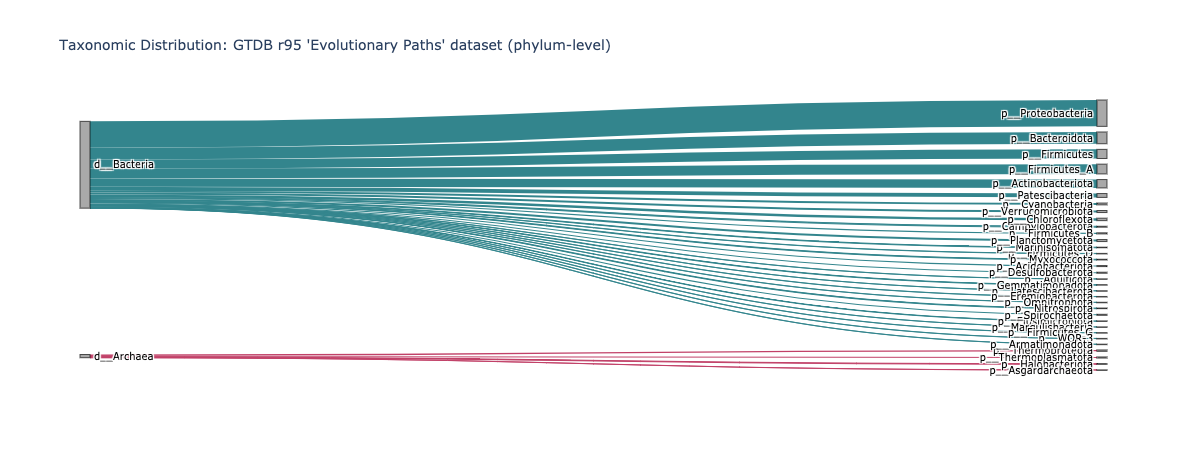

In [75]:
title = "Taxonomic Distribution: GTDB r95 'Evolutionary Paths' dataset (phylum-level)"
fig = lineages_to_flow(title, all_lineages, stop_rank="phylum", color_rank="superkingdom")
#fig.write_html('test.html')
fig.write_html('gtdb95-evolpaths-taxonomysankey.phylum.html')#, auto_open=True)
#fig.write_image("test_sankey.pdf")
#fig.write_image("test_sankey.png", scale=1)
fig.show()

33


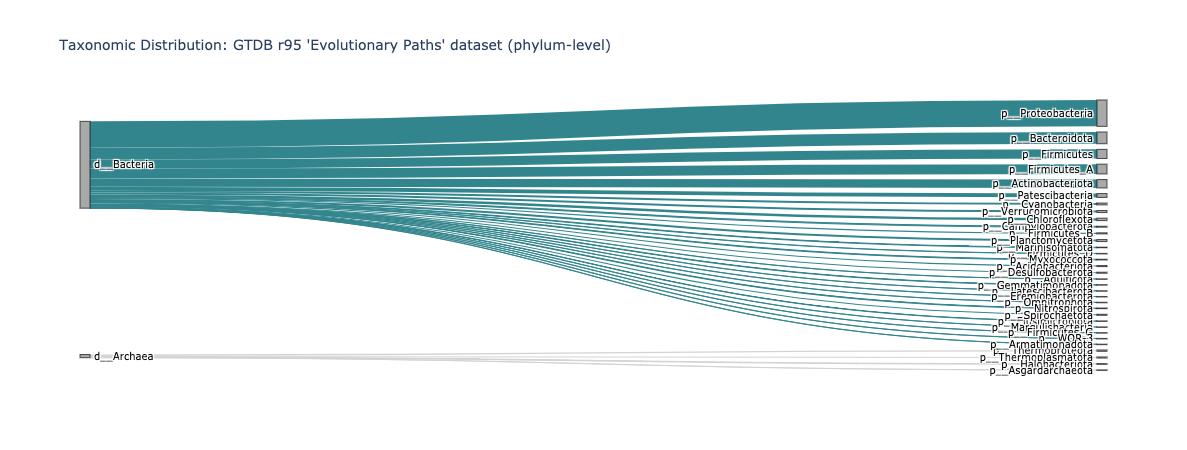

In [77]:
title = "Taxonomic Distribution: GTDB r95 'Evolutionary Paths' dataset (phylum-level)"
fig = lineages_to_flow(title, all_lineages, stop_rank="phylum", color_rank="superkingdom", color_lineage_subset=[lca_utils.make_lineage("d__Bacteria")])
#fig.write_html('test.html')
#fig.write_html('gtdb95-evolpaths-taxonomysankey.phylum.html', auto_open=True)
#fig.write_image("test_sankey.pdf")
#fig.write_image("test_sankey.png", scale=1)
fig.show()

33


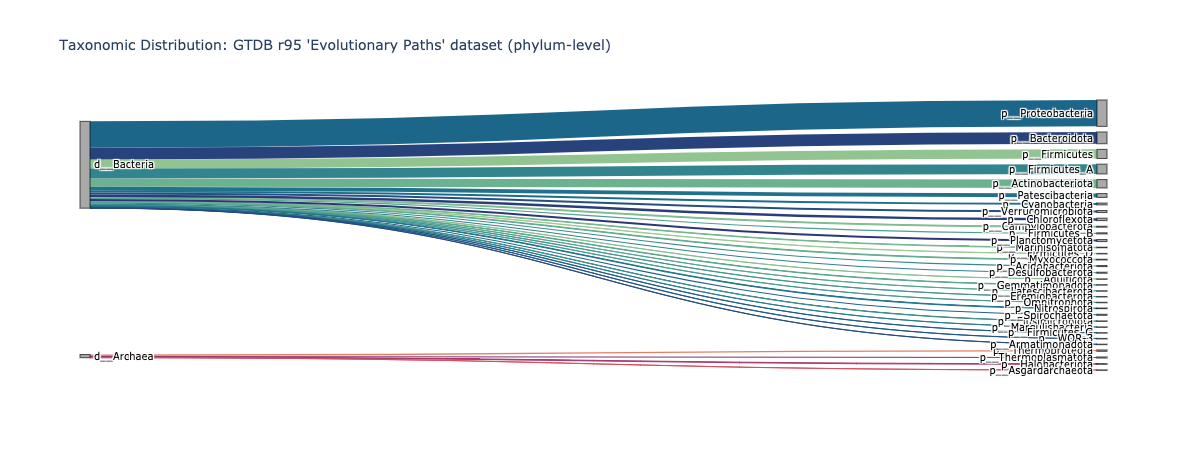

In [21]:
title = "Taxonomic Distribution: GTDB r95 'Evolutionary Paths' dataset (phylum-level)"
fig = lineages_to_flow(title, all_lineages, stop_rank="phylum", color_rank="phylum")
#fig.write_html('test.html')
fig.write_html('gtdb95-evolpaths-taxonomysankey.phylum.html', auto_open=True)
#fig.write_image("test_sankey.pdf")
#fig.write_image("test_sankey.png", scale=1)
fig.show()

104


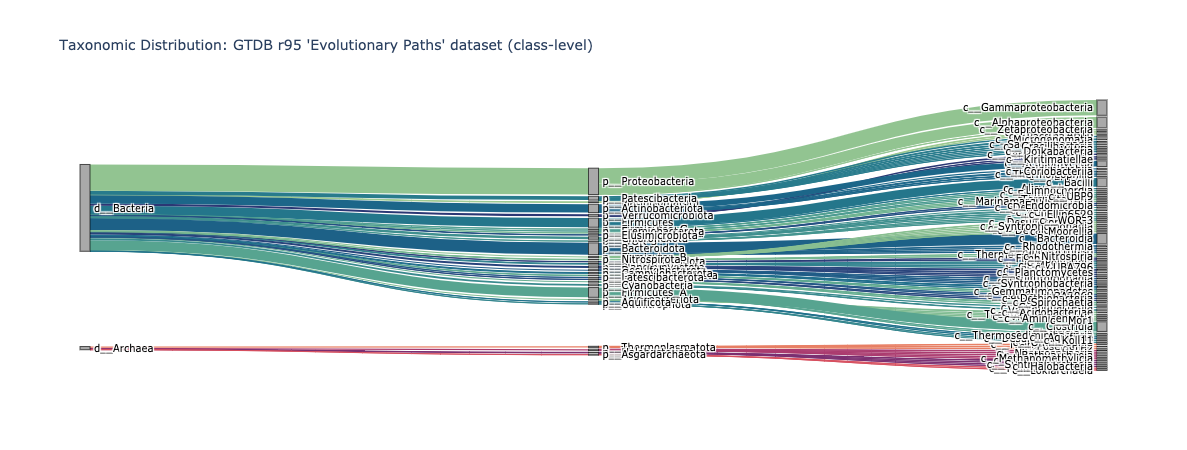

In [81]:
title = "Taxonomic Distribution: GTDB r95 'Evolutionary Paths' dataset (class-level)"
fig = lineages_to_flow(title, all_lineages, stop_rank="class", color_rank="phylum")
fig.write_html('gtdb95-evolpaths-taxonomysankey.class.html', auto_open=True)
fig.show()

104


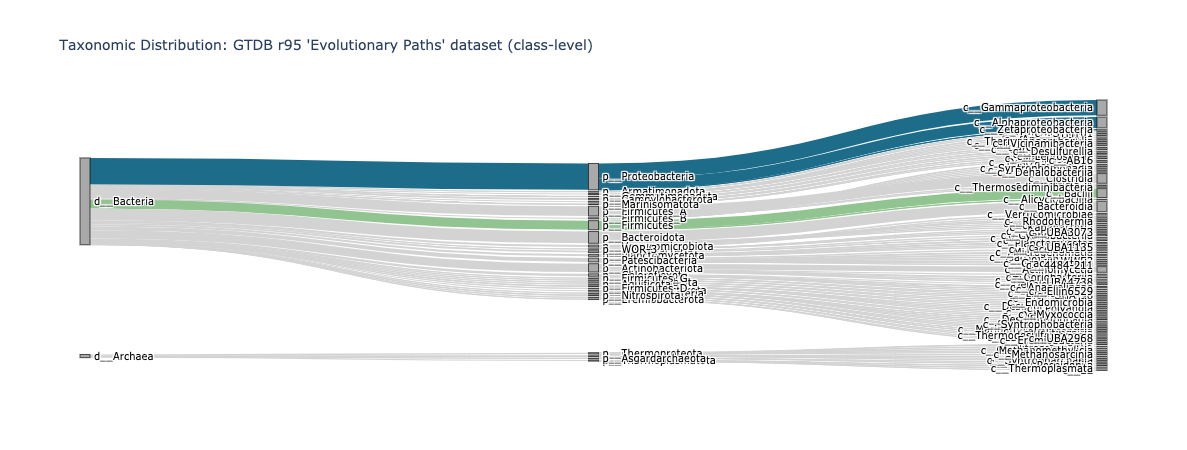

In [88]:
color_set = [lca_utils.make_lineage("d__Bacteria;p__Proteobacteria"), lca_utils.make_lineage("d__Bacteria;p__Firmicutes")]
title = "Taxonomic Distribution: GTDB r95 'Evolutionary Paths' dataset (class-level)"
fig = lineages_to_flow(title, all_lineages, stop_rank="class", color_rank="phylum",  color_lineage_subset=color_set)
fig.write_html('gtdb95-evolpaths-taxonomysankey.class.selective-coloration.html', auto_open=True)
fig.show()

302


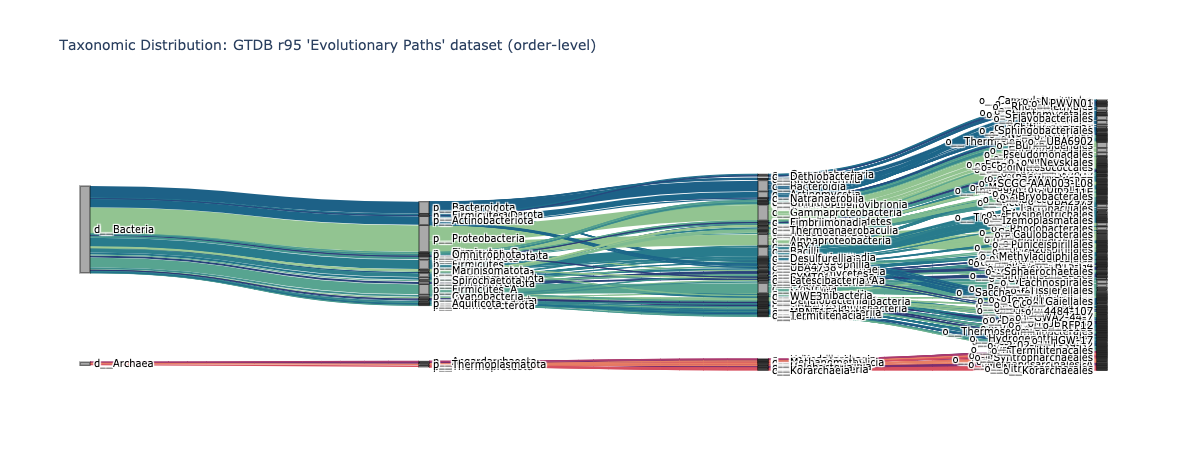

In [82]:
title = "Taxonomic Distribution: GTDB r95 'Evolutionary Paths' dataset (order-level)"
fig = lineages_to_flow(title, all_lineages, stop_rank="order")
fig.write_html('gtdb95-evolpaths-taxonomysankey.order.html', auto_open=True)
fig.show()

851


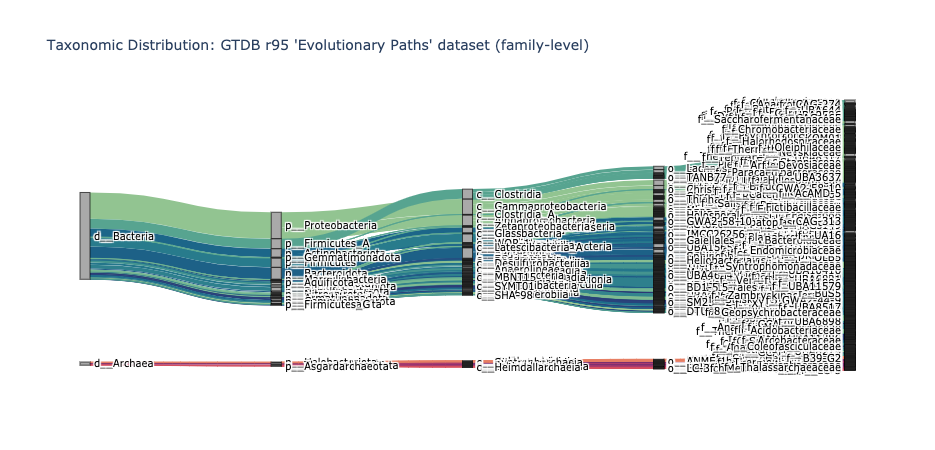

In [83]:
title = "Taxonomic Distribution: GTDB r95 'Evolutionary Paths' dataset (family-level)"
fig = lineages_to_flow(title, all_lineages, stop_rank="family")
fig.write_html('gtdb95-evolpaths-taxonomysankey.family.html', auto_open=True)
fig.show()

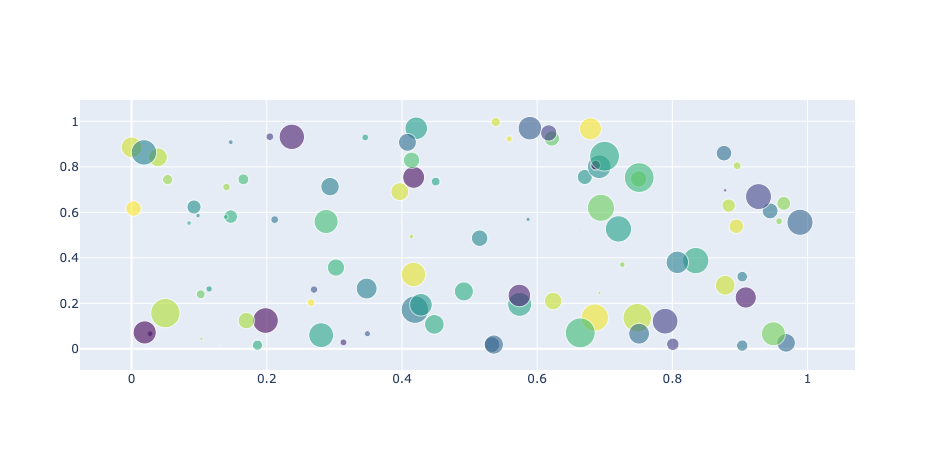

In [22]:
import numpy as np
np.random.seed(1)

N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
sz = np.random.rand(N) * 30

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode="markers",
    marker=go.scatter.Marker(
        size=sz,
        color=colors,
        opacity=0.6,
        colorscale="Viridis"
    )
))

fig.show()

In [15]:
# do I need this? Is plot made vertically or horizontally?
#def make_lin_counter(title, lineageD):
#    counts = collections.Counter()
#    for genome_name, lineage in lineageD.items():
#        counts[lineage] += 1
#        # then pop to rank until end, recording all lineages (counts)
#        for rank in lca_utils.taxlist(include_strain=False):
#            print(rank)
#            lin_at_rank = lca_utils.pop_to_rank(lineage, rank)
#            print(lin_at_rank)
#            counts[lin_at_rank] += 1
#    return counts

In [20]:
def split_lineages_to_columns(row):
    #rank_d = {"d__": "superkingdom", "p__": "phylum", "c__": "class", "o__": "order", "f__": "family", "g__": "genus", "s__": "species"}
    # split taxonomy column on ";"
    lineages = row["lineage"].split(";")
    row["superkingdom"] = lineages[0].split("d__")[1]
    row["phylum"] = lineages[1].split("p__")[1]
    row["class"] = lineages[2].split("c__")[1]
    row["order"] = lineages[3].split("o__")[1]
    row["family"] = lineages[4].split("f__")[1]
    row["genus"] = lineages[5].split("g__")[1]
    row["species"] = lineages[6].split("s__")[1]
    row["strain"] = ""
    return row


In [26]:
pathInfo = pathInfo.apply(split_lineages_to_columns, axis=1)

In [27]:
num_unique_genomes = pathInfo.accession.nunique()
print(f"Total unique genomes: {num_unique_genomes}")

Total unique genomes: 6690


In [28]:
num_bacterial_genomes = pathInfo[pathInfo["superkingdom"] == "Bacteria"].accession.nunique()
num_bacterial_genomes

6453

In [29]:
num_bacterial_genomes = pathInfo[pathInfo["superkingdom"] == "Bacteria"].accession.nunique()
num_archaeal_genomes = pathInfo[pathInfo["superkingdom"] == "Archaea"].accession.nunique()

print(f"Bacteria: {num_bacterial_genomes}")
print(f"Archaea: {num_archaeal_genomes}")

Bacteria: 6453
Archaea: 237


In [30]:
bact = pathInfo[pathInfo["superkingdom"] == "Bacteria"]
arch = pathInfo[pathInfo["superkingdom"] == "Archaea"]

In [31]:
bact_classes = bact["class"].nunique()
arch_classes = arch["class"].nunique()
bact_fams = bact["family"].nunique()
arch_fams = arch["family"].nunique()
bact_genuses = bact["genus"].nunique()
arch_genuses = arch["genus"].nunique()
bact_sp = bact["species"].nunique()
arch_sp = arch["species"].nunique()

print(f"Bacteria: ")
print(f"  phylums: {bact.phylum.nunique()}")
print(f"  classes: {bact_classes}")
print(f"  families: {bact_fams}")
print(f"  genuses: {bact_genuses}")
print(f"  species: {bact_sp}")
print("")
print(f"Archaea: ")
print(f"  phylums: {arch.phylum.nunique()}")
print(f"  classes: {arch_classes}")
print(f"  families: {arch_fams}")
print(f"  genuses: {arch_genuses}")
print(f"  species: {arch_sp}")

Bacteria: 
  phylums: 29
  classes: 90
  families: 796
  genuses: 3456
  species: 6453

Archaea: 
  phylums: 4
  classes: 14
  families: 55
  genuses: 132
  species: 237


## what else do we want to know?
- sankey plot of the species distribution of this set? Or alternative visualisation??

In [32]:
# first, count all taxonomy info. can use groupby!

genome_info = pathInfo.drop(columns=["path", "rank"])
#genome_info.drop_duplicates(inplace=True)
genome_info






,accession,lineage,superkingdom,phylum,class,order,family,genus,species,strain
0,GCA_003661365.1,d__Archaea;p__Thermoproteota;c__Korarchaeia;o_...,Archaea,Thermoproteota,Korarchaeia,Korarchaeales,QMVU01,QMVU01,QMVU01 sp003661365,
1,GCA_003661365.1,d__Archaea;p__Thermoproteota;c__Korarchaeia;o_...,Archaea,Thermoproteota,Korarchaeia,Korarchaeales,QMVU01,QMVU01,QMVU01 sp003661365,
2,GCA_003661365.1,d__Archaea;p__Thermoproteota;c__Korarchaeia;o_...,Archaea,Thermoproteota,Korarchaeia,Korarchaeales,QMVU01,QMVU01,QMVU01 sp003661365,
3,GCA_003661365.1,d__Archaea;p__Thermoproteota;c__Korarchaeia;o_...,Archaea,Thermoproteota,Korarchaeia,Korarchaeales,QMVU01,QMVU01,QMVU01 sp003661365,
4,GCA_003661365.1,d__Archaea;p__Thermoproteota;c__Korarchaeia;o_...,Archaea,Thermoproteota,Korarchaeia,Korarchaeales,QMVU01,QMVU01,QMVU01 sp003661365,
...,...,...,...,...,...,...,...,...,...,...
20694,GCA_002774315.1,d__Bacteria;p__WOR-3;c__UBA3073;o__UBA3073;f__...,Bacteria,WOR-3,UBA3073,UBA3073,UBA3073,UBA3073,UBA3073 sp002774315,
20695,GCA_003645615.1,d__Bacteria;p__WOR-3;c__WOR-3;o__SM23-42;f__B3...,Bacteria,WOR-3,WOR-3,SM23-42,B36-G15,B36-G15,B36-G15 sp003645615,
20696,GCA_001303785.1,d__Bacteria;p__WOR-3;c__WOR-3;o__SM23-42;f__SM...,Bacteria,WOR-3,WOR-3,SM23-42,SM23-42,SM23-42,SM23-42 sp001303785,
20697,GCA_001303225.1,d__Bacteria;p__WOR-3;c__WOR-3;o__SM23-42;f__SM...,Bacteria,WOR-3,WOR-3,SM23-42,SM23-42,DG-78,DG-78 sp001303225,
